In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [76]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/drive/MyDrive/Prodigy InfoTech/Task 2 - K Means Clustering/Mall_Customers.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [77]:
print(os.listdir('/content/drive/MyDrive/Prodigy InfoTech/Task 2 - K Means Clustering'))

['K-Means Clustering.ipynb', 'Mall_Customers.csv']


In [78]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # Pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        # Check if the column is numeric
        if not pd.api.types.is_numeric_dtype(columnDf):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotCorrelationMatrix(df, graphWidth, dataframeName='DataFrame'):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # If less than 2 columns are left, skip plotting
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Calculate correlation matrix
    corr = df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=False)  # Removed fignum=1 to avoid conflict
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)

    # Set the title for the plot
    plt.title(f'Correlation Matrix for {dataframeName}', fontsize=15)

    # Display the plot
    plt.show()

In [86]:
# Scatter and Density Plot function
def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    # Remove columns with NaN values
    df = df.dropna(axis=1)
    # Keep columns that have more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    # Limit the number of columns to 10 for better plotting performance
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    # Filter DataFrame to selected columns
    df = df[columnNames]
    # Create the scatter matrix plot
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    # Compute correlation matrix for annotations
    corrs = df.corr().values
    # Annotate the upper triangle of the scatter plot with correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):  # Using np.triu_indices_from for upper triangular indices
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2),
                          xycoords='axes fraction', ha='center', va='center', size=textSize)
    # Set a title for the entire plot
    plt.suptitle('Scatter and Density Plot')
    # Display the plot
    plt.show()

In [37]:
df1.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


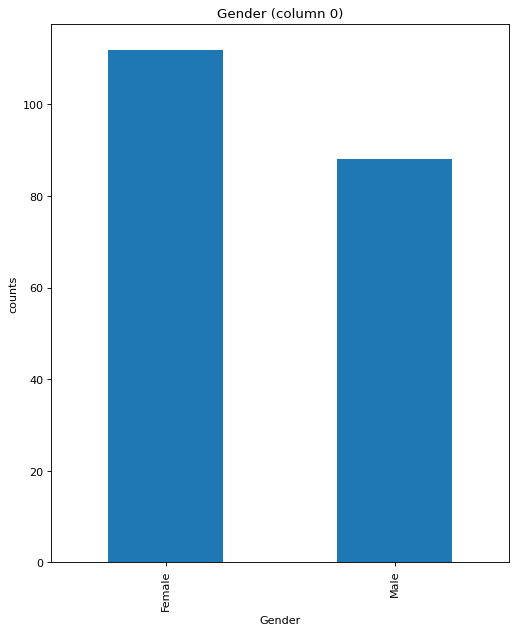

In [79]:
# Example usage
plotPerColumnDistribution(df1, 10, 5)

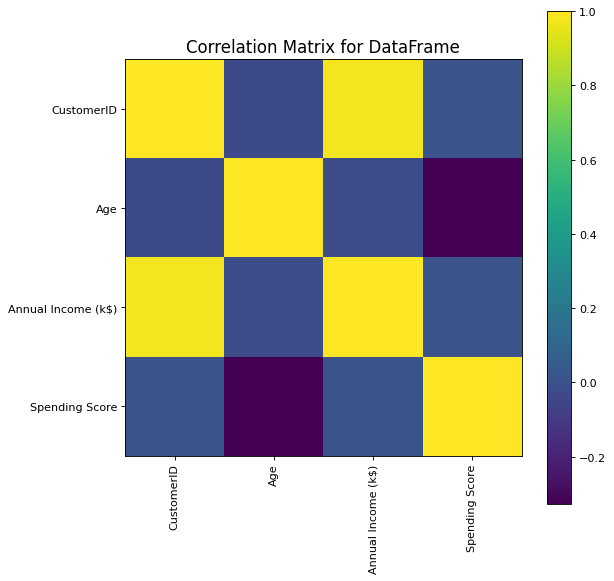

In [91]:
# Example usage:
plotCorrelationMatrix(df1, 8)

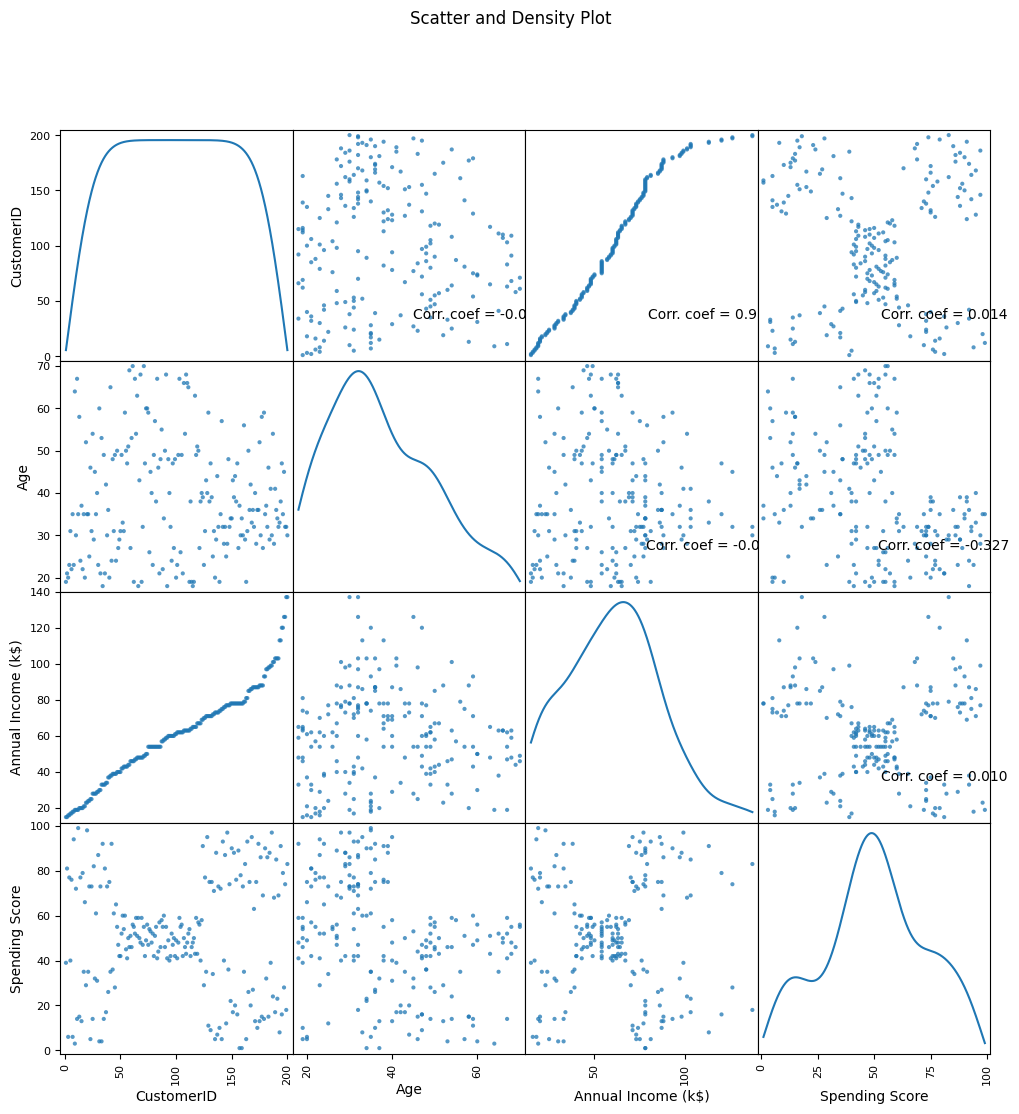

In [87]:
plotScatterMatrix(df1, 12, 10)